## Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("phucthaiv02/butterfly-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/phucthaiv02/butterfly-image-classification/versions/2


## Loading the downloaded dataset

In [3]:
train_ds = image_dataset_from_directory(
    path,
    validation_split=0.3,
    subset="training",
    seed=42,
    image_size=(128, 128),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    path,
    validation_split=0.3,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=32
)

Found 9285 files belonging to 2 classes.
Using 6500 files for training.
Found 9285 files belonging to 2 classes.
Using 2785 files for validation.


In [4]:
class_names = train_ds.class_names
num_classes = len(class_names)

## Normalization

In [5]:
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [6]:
model = tf.keras.Sequential([
    #Block 1
    layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(128,128,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.1),

    #Block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.1),

    #Block 3
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.1),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(num_classes,activation="softmax")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [8]:
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [9]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=50)

Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 26s 78ms/step - accuracy: 0.5049 - loss: 1.1158 - val_accuracy: 0.6919 - val_loss: 0.7230
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.6334 - loss: 0.6577 - val_accuracy: 0.4223 - val_loss: 1.9848
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7023 - loss: 0.5800 - val_accuracy: 0.6022 - val_loss: 1.0538
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7435 - loss: 0.5247 - val_accuracy: 0.6090 - val_loss: 0.7723
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7806 - loss: 0.4745 - val_accuracy: 0.6050 - val_loss: 0.8017
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8096 - loss: 0.4221 - val_accuracy: 0.5889 - val_loss: 0.8108
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8399 - loss: 0.3831 - val_accuracy: 0.5968 - val_loss: 0.8031
Epoch 8/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8345 - loss: 0.3735 - val_

## Model Evaluation

In [10]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6297 - loss: 1.6834
Validation Loss: 1.6988
Validation Accuracy: 0.6244


## Visualization

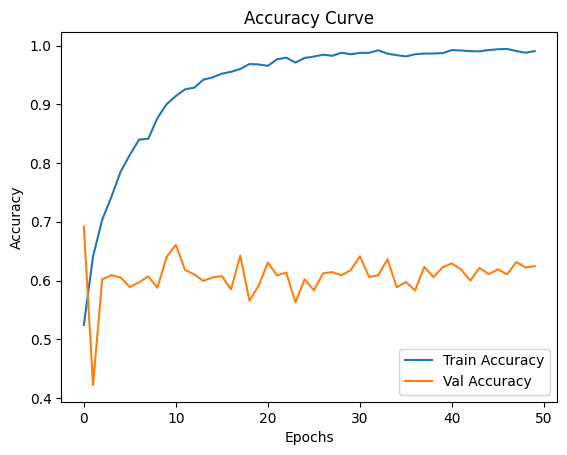

In [11]:
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

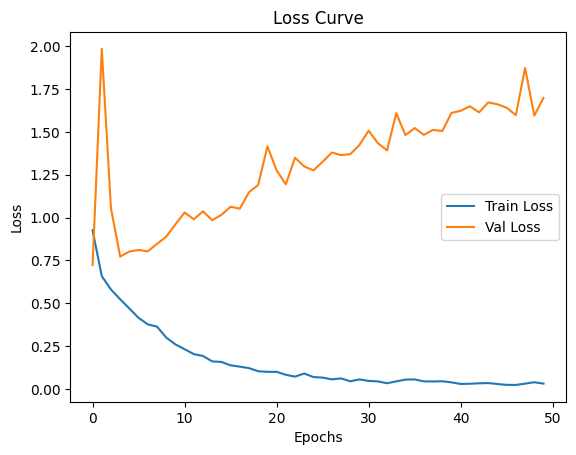

In [12]:
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()